In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [62]:
df = pd.read_csv("../docs/error_voltage_all.csv")
df

,0.5v,3v,6v,9v,12v,15v,18v,21v
0,0.01,0.36,0.02,0.04,0.01,-0.04,-0.07,-0.12
1,-0.04,0.02,0.02,-0.06,-0.16,-0.04,-0.04,-0.12
2,0.01,-0.10,0.02,0.02,-0.04,-0.01,-0.02,-0.09
3,-0.04,-0.05,-0.01,-0.08,0.01,-0.01,-0.19,-0.22
4,0.06,0.05,-0.03,-0.13,-0.01,-0.16,-0.02,-0.17
...,...,...,...,...,...,...,...,...
995,-0.06,-0.08,0.07,0.04,-0.01,-0.01,-0.04,-0.12
996,-0.16,0.07,-0.05,0.04,-0.01,-0.01,-0.19,-0.09
997,0.04,0.05,-0.10,0.04,0.04,-0.01,-0.07,-0.04
998,-0.13,0.00,0.07,0.04,-0.01,-0.01,-0.02,-0.09


In [63]:
list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

list_voltage

['0.5v', '3v', '6v', '9v', '12v', '15v', '18v', '21v']

In [64]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']

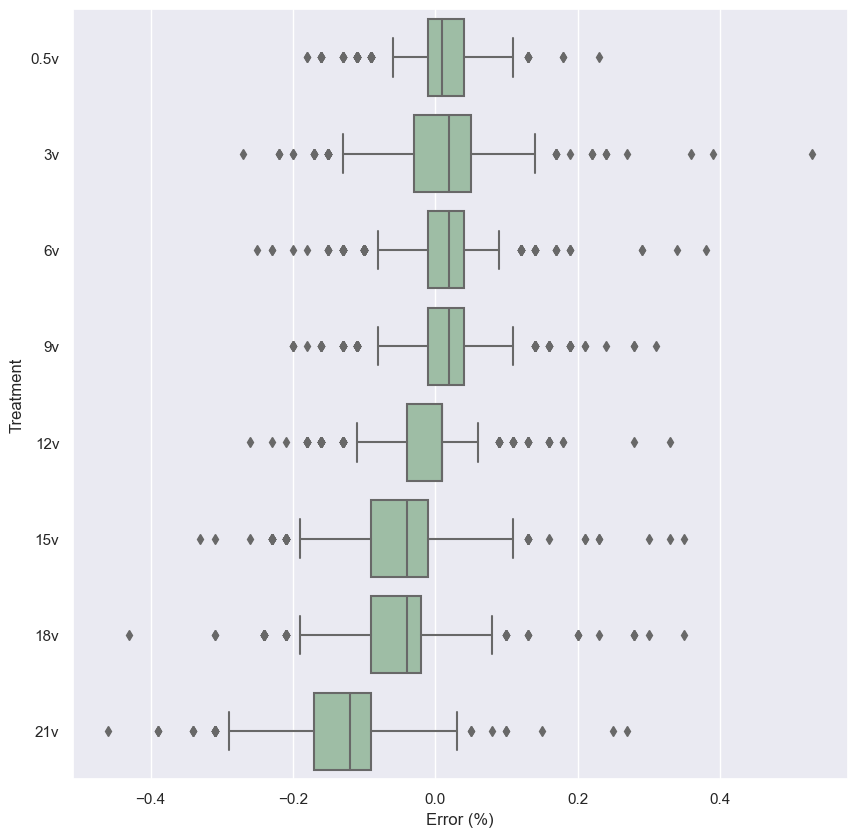

In [81]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxplot(x='value', y='voltage', data=df_melt, color='#99c2a2')
ax.set(xlabel='Error (%)', ylabel='Treatment')
plt.show()

In [66]:

f_stat, p_value = scipy.stats.f_oneway(df["0.5v"], df["3v"], df["6v"], df["9v"], df["12v"], df["15v"], df["18v"], df["21v"])
print(f"{f_stat}, {p_value}")

579.1500320404241, 0.0


In [67]:
df.columns

Index(['0.5v', '3v', '6v', '9v', '12v', '15v', '18v', '21v'], dtype='object')

<AxesSubplot:title={'center':'value'}, xlabel='voltage'>

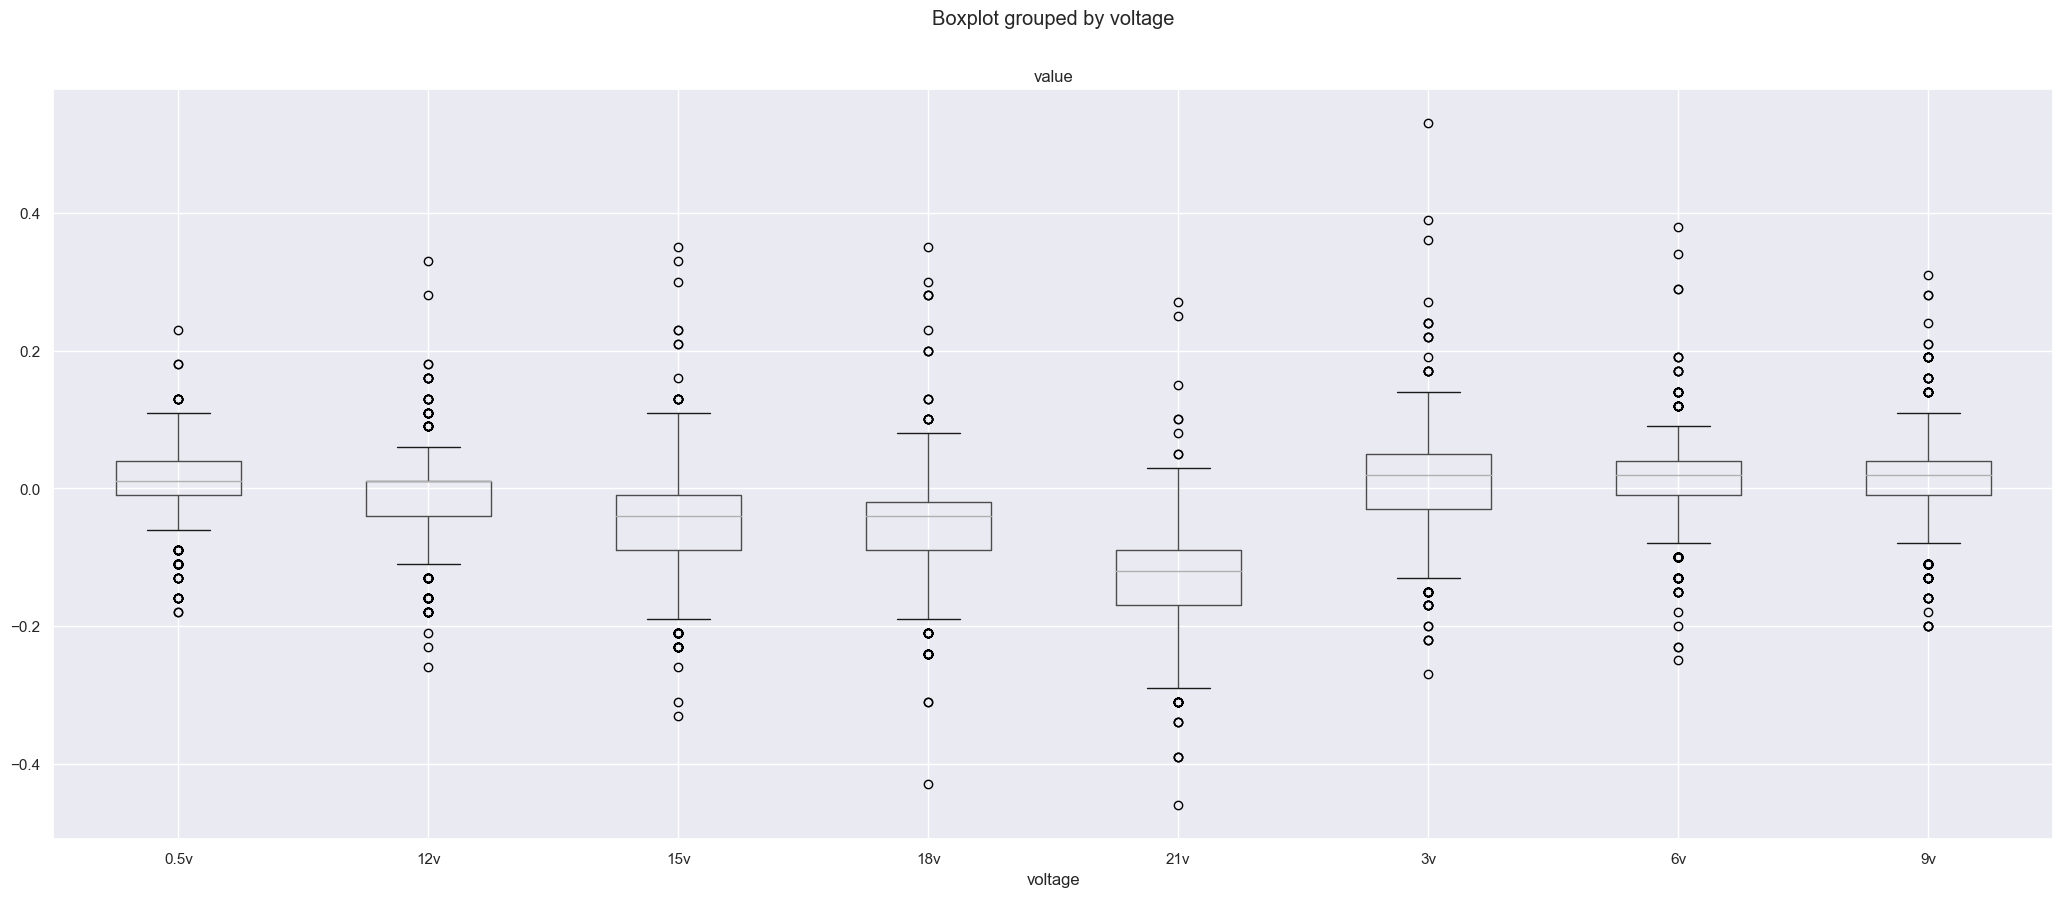

In [68]:
df_melt.boxplot('value', by='voltage')

In [69]:
new = ols('value ~ voltage', data = df_melt).fit()
an = sm.stats.anova_lm(new)
an

,df,sum_sq,mean_sq,F,PR(>F)
voltage,7.0,16.718102,2.388300,579.150032,0.0
Residual,7992.0,32.957428,0.004124,NaN,NaN


In [70]:
df

,0.5v,3v,6v,9v,12v,15v,18v,21v
0,0.01,0.36,0.02,0.04,0.01,-0.04,-0.07,-0.12
1,-0.04,0.02,0.02,-0.06,-0.16,-0.04,-0.04,-0.12
2,0.01,-0.10,0.02,0.02,-0.04,-0.01,-0.02,-0.09
3,-0.04,-0.05,-0.01,-0.08,0.01,-0.01,-0.19,-0.22
4,0.06,0.05,-0.03,-0.13,-0.01,-0.16,-0.02,-0.17
...,...,...,...,...,...,...,...,...
995,-0.06,-0.08,0.07,0.04,-0.01,-0.01,-0.04,-0.12
996,-0.16,0.07,-0.05,0.04,-0.01,-0.01,-0.19,-0.09
997,0.04,0.05,-0.10,0.04,0.04,-0.01,-0.07,-0.04
998,-0.13,0.00,0.07,0.04,-0.01,-0.01,-0.02,-0.09


In [71]:
df_melt

,index,voltage,value
0,0,0.5v,0.01
1,1,0.5v,-0.04
2,2,0.5v,0.01
3,3,0.5v,-0.04
4,4,0.5v,0.06
...,...,...,...
7995,995,21v,-0.12
7996,996,21v,-0.09
7997,997,21v,-0.04
7998,998,21v,-0.09


Post Hoc Comparison, Tukey-kramer formula

In [72]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
df = res.tukey_summary

g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


In [73]:
val = []
for i in df["p-value"]:
    if i > 0.05:
        val.append("False")
    else:
        val.append("True")
val = pd.DataFrame(val, columns=["reject"])
df = pd.concat([df, val], axis=1)
df.to_csv('../docs/Tukey-HSD-p-value.csv', index=False)
df.to_excel('../docs/Tukey-HSD-p-value.xlsx', index=False)
df

,group1,group2,Diff,Lower,Upper,q-value,p-value,reject
0,0.5v,3v,0.01153,0.002823,0.020237,5.677804,0.001548,True
1,0.5v,6v,0.00005,-0.008657,0.008757,0.024622,0.900000,False
2,0.5v,9v,0.00168,-0.007027,0.010387,0.827295,0.900000,False
3,0.5v,12v,0.02649,0.017783,0.035197,13.044668,0.001000,True
4,0.5v,15v,0.05781,0.049103,0.066517,28.467809,0.001000,True
5,0.5v,18v,0.06779,0.059083,0.076497,33.382335,0.001000,True
6,0.5v,21v,0.13999,0.131283,0.148697,68.936320,0.001000,True
7,3v,6v,0.01148,0.002773,0.020187,5.653182,0.001659,True
8,3v,9v,0.00985,0.001143,0.018557,4.850509,0.014083,True
9,3v,12v,0.01496,0.006253,0.023667,7.366864,0.001000,True


In [77]:
only_p_value = df.drop(["Diff","Lower","Upper","q-value"], axis=1)
only_p_value.to_csv("../docs/tukey_only_p-value.csv", index=False)
only_p_value.to_excel("../docs/tukey_only_p-value.xlsx", index=False)